<a href="https://colab.research.google.com/github/PollySaa/Labs_mashin/blob/main/Laba_mashin_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Парная линейная регрессия**

**Выполнила:** Смирнова П.М.

**Группа:** БИВТ-22-СП-4

**Цель работы**

Познакомиться с основными понятиями задачи регрессии и метода градиентного спуска.

**Содержание работы**

1. Загрузить данные из тектовых файлов.
2. Создать и построить модель парной линейной регрессии с использованием метода градиентного спуска.
3. Оценить на графике качество построенной модели.
4. Построить кривые обучения.

Импорт нужных библиотек

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Считывание данных о котировке двух инструментов из csv-файлов

In [ ]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)["0"]
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)["0"]

Смотрим формат файла с данными - состав и названия полей

In [ ]:
x.head()

,0
0,1.462108
1,1.133769
2,-2.301539
3,1.744812
4,0.042214


Смотрим размеры массивов x и y

In [ ]:
x.shape, y.shape

((20,), (20,))

Для визуального представления совместного распределения значений используемых строим график зависимости одной переменной от другой

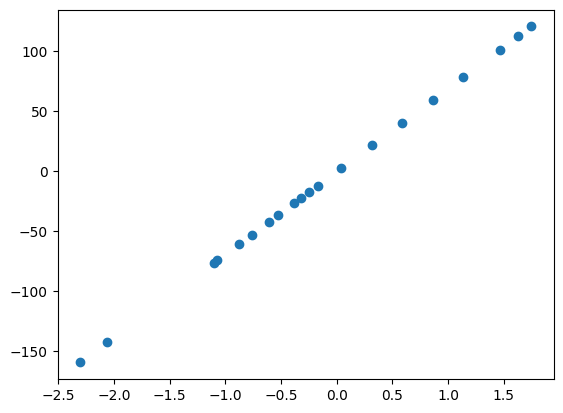

In [ ]:
plt.figure()
plt.scatter(x, y)
plt.show()

Класс, который будет реализовывать метод парной линейной регрессии

In [ ]:
class Model(object):
    def __init__(self):
        self.b0 = 1
        self.b1 = 1
        self.errors = []

    def predict(self, x):
        return self.b0 + self.b1 * x

    def error(self, x, y):
        return sum((self.predict(x) - y)**2) / (2 * len(y))

    def fit(self, x, y):
        alpha = 0.5
        for _ in range(100):
          dJ0 = sum(self.predict(x) - y) /len(y)
          dJ1 = sum((self.predict(x) - y) * x) /len(y)
          self.b0 -= alpha * dJ0
          self.b1 -= alpha * dJ1
          self.errors.append(self.error(x, y))

In [ ]:
model = Model()
print("Начальная ошибка:", model.error(x, y))

Начальная ошибка: 2862.9340147066887


In [ ]:
model.fit(x, y)
print("Конечная ошибка:", model.error(x, y))

Конечная ошибка: 7.948266658167457e-29


Регрессия на графике

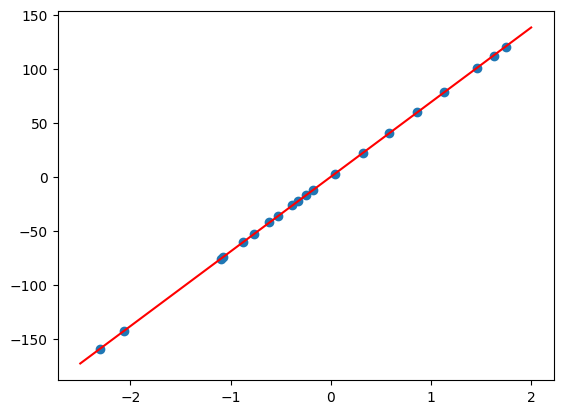

In [ ]:
plt.figure()
plt.scatter(x, y)

x_pred = np.linspace(-2.5, 2, 100)
y_pred = model.predict(x_pred)
plt.plot(x_pred, y_pred, 'r')

plt.show()

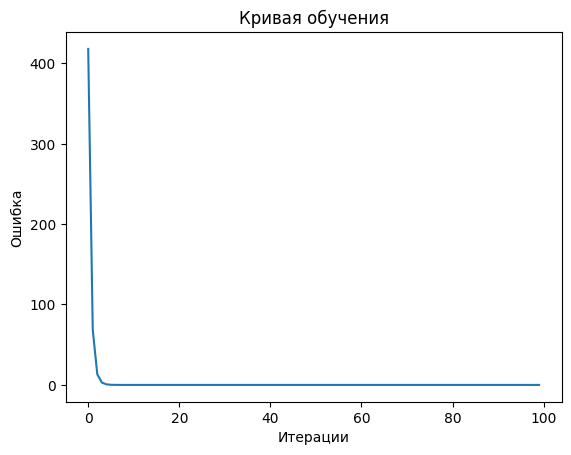

In [ ]:
plt.figure()
plt.plot(model.errors)
plt.xlabel('Итерации')
plt.ylabel('Ошибка')
plt.title('Кривая обучения')
plt.show()

# **Задания для самостоятельной работы**

1. Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.
2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.
3. Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.
4. Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.
5. Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов.
6. Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр alpha можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.
7. Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.

1. Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)["0"]
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)["0"]

class Model:
    def __init__(self):
        self.b0 = np.random.randn()
        self.b1 = np.random.randn()
        self.errors = []
        self.alpha = 0.1
        self.tolerance = 1e-6
        self.max_iterations = 1000

    def predict(self, x):
        return self.b0 + self.b1 * x

    def error(self, x, y):
        return sum((self.predict(x) - y)**2) / (2 * len(y))

    def fit(self, x, y):
        x = np.array(x)
        y = np.array(y)
        self.errors = []
        iteration = 0
        prev_error = float('inf')

        while iteration < self.max_iterations:
            dJ0 = sum(self.predict(x) - y) / len(y)
            dJ1 = sum((self.predict(x) - y) * x) / len(y)
            self.b0 -= self.alpha * dJ0
            self.b1 -= self.alpha * dJ1

            current_error = self.error(x, y)
            self.errors.append(current_error)

            if abs(prev_error - current_error) < self.tolerance:
                print(f"Обучение завершено на итерации {iteration}: ошибка стабилизировалась.")
                break

            prev_error = current_error
            iteration += 1

        if iteration == self.max_iterations:
            print("Обучение завершено: достигнуто максимальное количество итераций.")

print("Тестирование с разными начальными значениями:")
for _ in range(5):
    model = Model()
    model.fit(x, y)
    print(f"b0: {model.b0}, b1: {model.b1}, конечная ошибка: {model.errors[-1]}")

Тестирование с разными начальными значениями:
Обучение завершено на итерации 92: ошибка стабилизировалась.
b0: -0.002655345558609007, b1: 69.18629534626487, конечная ошибка: 4.254511521811717e-06
Обучение завершено на итерации 92: ошибка стабилизировалась.
b0: -0.0026662796100808367, b1: 69.18629399826433, конечная ошибка: 4.2834046856181285e-06
Обучение завершено на итерации 92: ошибка стабилизировалась.
b0: -0.002666278428966841, b1: 69.18629388023095, конечная ошибка: 4.28356513427741e-06
Обучение завершено на итерации 92: ошибка стабилизировалась.
b0: -0.002744822604079336, b1: 69.18625854357164, конечная ошибка: 4.530531412463072e-06
Обучение завершено на итерации 93: ошибка стабилизировалась.
b0: -0.0025218579023369913, b1: 69.18638424759902, конечная ошибка: 3.8144140335669562e-06


2. Проверка работы модели с разными значениями скорости обучения

In [ ]:
print("\nТестирование с разными значениями скорости обучения:")
alphas = [0.001, 0.01, 0.1, 0.5, 1.0, 2.0]
for alpha in alphas:
    model = Model()
    model.alpha = alpha
    model.fit(x, y)
    print(f"alpha: {alpha}, конечная ошибка: {model.errors[-1]}")


Тестирование с разными значениями скорости обучения:
Обучение завершено: достигнуто максимальное количество итераций.
alpha: 0.001, конечная ошибка: 251.41756187951984
Обучение завершено на итерации 838: ошибка стабилизировалась.
alpha: 0.01, конечная ошибка: 5.148657667614127e-05
Обучение завершено на итерации 93: ошибка стабилизировалась.
alpha: 0.1, конечная ошибка: 3.7921906613032037e-06
Обучение завершено на итерации 16: ошибка стабилизировалась.
alpha: 0.5, конечная ошибка: 1.6423112989409376e-07
Обучение завершено на итерации 9: ошибка стабилизировалась.
alpha: 1.0, конечная ошибка: 4.2466857794187385e-08
Обучение завершено: достигнуто максимальное количество итераций.
alpha: 2.0, конечная ошибка: inf


<ipython-input-1-b119a770a514>:22: RuntimeWarning: overflow encountered in scalar add
  return sum((self.predict(x) - y)**2) / (2 * len(y))
<ipython-input-1-b119a770a514>:40: RuntimeWarning: invalid value encountered in scalar subtract
  if abs(prev_error - current_error) < self.tolerance:
<ipython-input-1-b119a770a514>:22: RuntimeWarning: overflow encountered in square
  return sum((self.predict(x) - y)**2) / (2 * len(y))


3. Модификация кода для работы с Series и DataFrame

In [ ]:
class Model:
    def __init__(self):
        self.b0 = np.random.randn()
        self.b1 = np.random.randn()
        self.errors = []
        self.alpha = 0.1
        self.tolerance = 1e-6
        self.max_iterations = 1000

    def predict(self, x):
        return self.b0 + self.b1 * x

    def error(self, x, y):
        return sum((self.predict(x) - y)**2) / (2 * len(y))

    def fit(self, x, y):
        x = np.array(x).flatten()
        y = np.array(y).flatten()
        self.errors = []
        iteration = 0
        prev_error = float('inf')

        while iteration < self.max_iterations:
            dJ0 = sum(self.predict(x) - y) / len(y)
            dJ1 = sum((self.predict(x) - y) * x) / len(y)
            self.b0 -= self.alpha * dJ0
            self.b1 -= self.alpha * dJ1

            current_error = self.error(x, y)
            self.errors.append(current_error)

            if abs(prev_error - current_error) < self.tolerance:
                print(f"Обучение завершено на итерации {iteration}: ошибка стабилизировалась.")
                break

            prev_error = current_error
            iteration += 1

        if iteration == self.max_iterations:
            print("Обучение завершено: достигнуто максимальное количество итераций.")

6. Механизм адаптивной скорости обучения

In [ ]:
class Model:
    def __init__(self):
        self.b0 = np.random.randn()
        self.b1 = np.random.randn()
        self.errors = []
        self.alpha = 1.0
        self.tolerance = 1e-6
        self.max_iterations = 1000

    def predict(self, x):
        return self.b0 + self.b1 * x

    def error(self, x, y):
        return sum((self.predict(x) - y)**2) / (2 * len(y))

    def fit(self, x, y):
        x = np.array(x).flatten()
        y = np.array(y).flatten()
        self.errors = []
        iteration = 0
        prev_error = float('inf')

        while iteration < self.max_iterations:
            dJ0 = sum(self.predict(x) - y) / len(y)
            dJ1 = sum((self.predict(x) - y) * x) / len(y)
            self.b0 -= self.alpha * dJ0
            self.b1 -= self.alpha * dJ1

            current_error = self.error(x, y)
            self.errors.append(current_error)

            if abs(prev_error - current_error) < self.tolerance:
                print(f"Обучение завершено на итерации {iteration}: ошибка стабилизировалась.")
                break

            if iteration > 0 and self.errors[-1] > self.errors[-2]:
                self.alpha /= 2
                print(f"Скорость обучения уменьшена до {self.alpha}")

            prev_error = current_error
            iteration += 1

        if iteration == self.max_iterations:
            print("Обучение завершено: достигнуто максимальное количество итераций.")

7. Метод рисования графиков